In [1]:
run readMethionine.py

Methionine/20210701_30_Std01_MetA_Full_1e5.txt


c:\Users\tacse\Documents\Modified HPLC Introduction Paper\Reservoir Inject Upload\dataAnalyzerMN_FTStat.py:260: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  df = df[df['retTime'].between(timeFrame[0], timeFrame[1], inclusive=True)]


Methionine/20210701_32_Smp01_MetCarb_Full_1e5.txt
Methionine/20210701_34_Std02_MetA_Full_1e5.txt
Methionine/20210701_36_Smp02_MetCarb_Full_1e5.txt
Methionine/20210701_38_Std03_MetA_Full_1e5.txt
Methionine/20210701_40_Smp03_MetCarb_Full_1e5.txt
Methionine/20210701_42_Std04_MetA_Full_1e5.txt
20210701_30_Std01_MetA_Full_1e5.txt D 150 has 203 zero scans, out of 13280 scans (0.015286144578313253)
20210701_32_Smp01_MetCarb_Full_1e5.txt D 150 has 249 zero scans, out of 13370 scans (0.01862378459237098)
20210701_34_Std02_MetA_Full_1e5.txt D 150 has 190 zero scans, out of 13284 scans (0.014302920806985848)
20210701_36_Smp02_MetCarb_Full_1e5.txt D 150 has 438 zero scans, out of 13393 scans (0.03270365116105428)
20210701_38_Std03_MetA_Full_1e5.txt D 150 has 331 zero scans, out of 13302 scans (0.024883476168997144)
20210701_40_Smp03_MetCarb_Full_1e5.txt D 150 has 388 zero scans, out of 13389 scans (0.02897901262230189)
20210701_42_Std04_MetA_Full_1e5.txt D 150 has 416 zero scans, out of 13300 scan

7it [00:23,  3.29s/it]
7it [00:23,  3.36s/it]
7it [00:22,  3.19s/it]
7it [00:22,  3.22s/it]
7it [00:26,  3.74s/it]
7it [00:20,  2.88s/it]
7it [00:23,  3.42s/it]


Failed Subsequence Detection 20210701_42_Std04_MetA_Full_1e5.txt 150 15N with a value of 0.66


7it [00:00, ?it/s]


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import seaborn as sns
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot

In [3]:
def subsequenceOutlierDetection(timeSeries, priorSubsequenceLength = 1000, testSubsequenceLength = 1000):
    allDev = []
    for i in range(priorSubsequenceLength,len(timeSeries)-testSubsequenceLength):
        thisSubsequence = timeSeries[i:i+testSubsequenceLength]
        thisPrediction = timeSeries[i-priorSubsequenceLength:i].mean()
        meanZScore = np.abs(((thisSubsequence.values - thisPrediction) / thisSubsequence.std()).mean())
        allDev.append(meanZScore)

    return np.array(allDev)

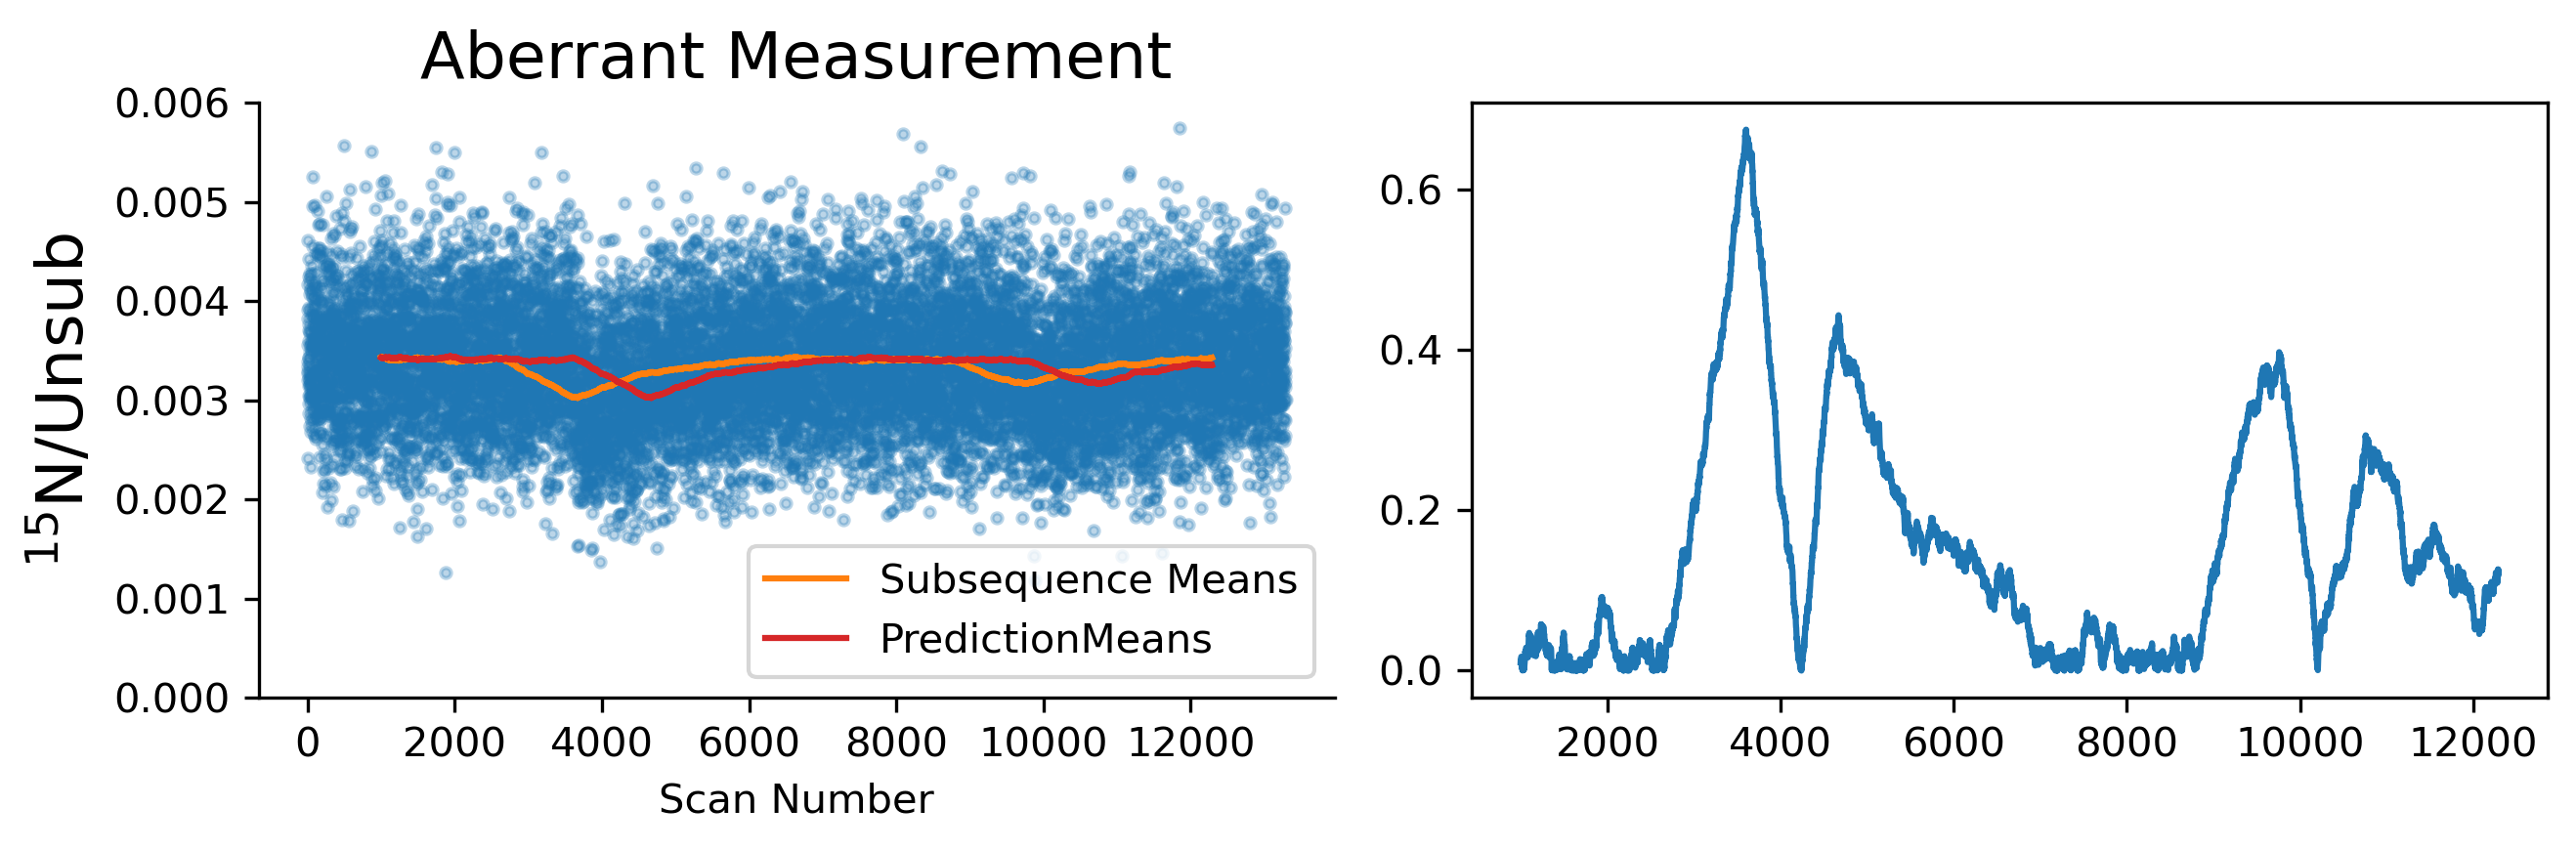

In [4]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (9,3), dpi = 300)
targetRat = '15N/Unsub'
sub1, sub2 = targetRat.split('/')

cDf = mergedList[6][0]
cDf = cDf[(cDf['counts15N'] != 0) & (cDf['countsUnsub'] != 0)]

series = cDf[targetRat]
l = len(series)
serrs = []

priorSubsequenceLength = 1000
testSubsequenceLength = 1000
cAx = axes[0]
thisSubsequenceList = []
thisPredictionList = []
allDev = []
meanDev = []
for i in range(priorSubsequenceLength, len(series) - testSubsequenceLength):
    priorSubsequence = series[i-priorSubsequenceLength:i]
    priorSubsequenceMean = priorSubsequence.mean()
    thisSubsequence = series[i:i+testSubsequenceLength]
    thisSubsequenceMean = thisSubsequence.mean()

    thisSubsequenceList.append(thisSubsequenceMean)
    thisPredictionList.append(priorSubsequenceMean)

    #sum of z scores
    sds = np.abs(((thisSubsequence.values - priorSubsequenceMean) / priorSubsequence.std()).mean())
    allDev.append(sds)
    thisMeanDev = (thisSubsequenceMean - priorSubsequenceMean)**2
    meanDev.append(thisMeanDev)
    
cAx.scatter(range(len(series)),series,s = 6, alpha = 0.3)
cAx.plot(range(priorSubsequenceLength,len(series)-testSubsequenceLength),thisSubsequenceList, label = "Subsequence Means", c = 'tab:orange')
cAx.plot(range(priorSubsequenceLength,len(series)-testSubsequenceLength),thisPredictionList, label = "PredictionMeans", c = 'tab:red')

cAx.set_ylim(0,0.006)
cAx.set_ylabel("$^{15}$N/Unsub", fontsize = 16)
cAx.set_xlabel("Scan Number")
cAx.set_title("Aberrant Measurement", fontsize =16)
cAx.legend()

cAx.spines['right'].set_visible(False)
cAx.spines['top'].set_visible(False)

cAx.spines['top'].set_visible(False)
#cAx.spines['left'].set_visible(False)
cAx.spines['right'].set_visible(False)

plt.tight_layout()

#fig.savefig("Good vs Bad 15NUnsub.png", bbox_inches = 'tight', dpi = 1000)

cAx = axes[1]

cAx.plot(range(priorSubsequenceLength,len(series)-testSubsequenceLength), allDev)

100%|██████████| 100/100 [01:09<00:00,  1.44it/s]


0.17656690613509493
0.12020607886895593
0.018735865350528656
0.17641367492054189


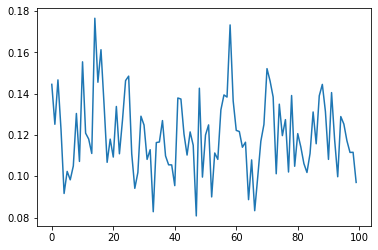

In [5]:
from tqdm import tqdm

maxMax = []
for k in tqdm(range(100)):

    series = np.random.normal(loc = 0.003346362416524123, scale = 0.0006044300005301175, size = 10000)

    priorSubsequenceLength = 1000
    testSubsequenceLength = 1000
    cAx = axes[0]
    thisSubsequenceList = []
    thisPredictionList = []
    allDev = []
    meanDev = []

    for i in range(priorSubsequenceLength, len(series) - testSubsequenceLength):
        priorSubsequence = series[i-priorSubsequenceLength:i]
        priorSubsequenceMean = priorSubsequence.mean()
        thisSubsequence = series[i:i+testSubsequenceLength]
        thisSubsequenceMean = thisSubsequence.mean()

        thisSubsequenceList.append(thisSubsequenceMean)
        thisPredictionList.append(priorSubsequenceMean)

        #sum of z scores
        sds = np.abs(((thisSubsequence - priorSubsequenceMean) / priorSubsequence.std()).mean())
        allDev.append(sds)
        thisMeanDev = (thisSubsequenceMean - priorSubsequenceMean)**2
        meanDev.append(thisMeanDev)

    maxMax.append(np.array(allDev).max())

print(np.array(maxMax).max())
plt.plot(range(len(maxMax)), maxMax)

maxArr = np.array(maxMax)

print(maxArr.mean())
print(maxArr.std())

print(maxArr.mean() + 3 * maxArr.std())

Proportion Above
0.0
Proportion Above
0.3054867256637168


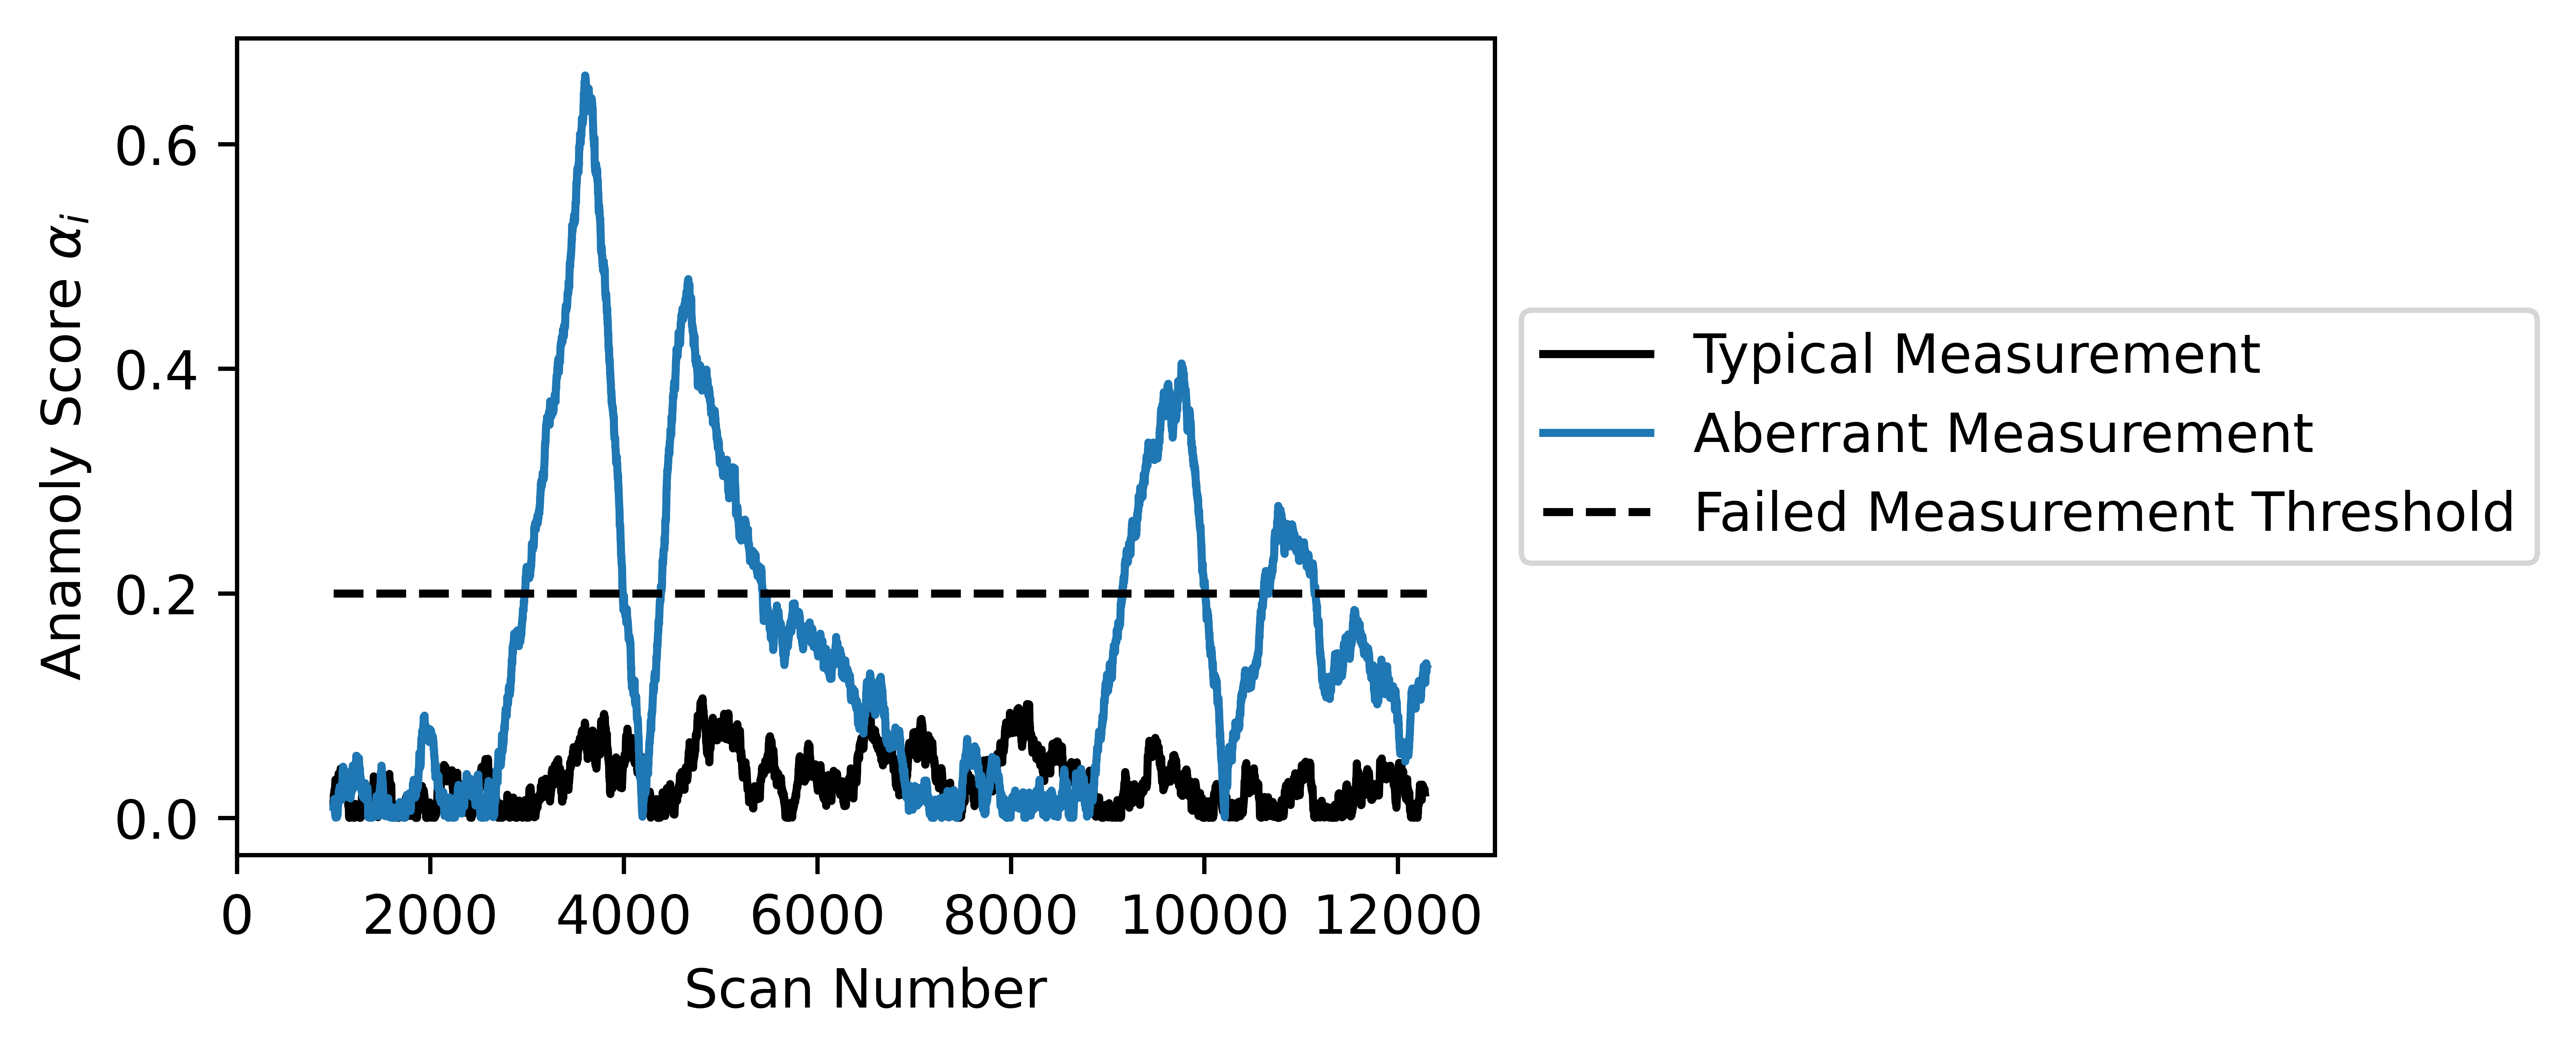

In [11]:
colors = ['k','tab:orange','tab:red','tab:green','tab:brown','tab:purple','tab:blue']
#Subs = ['13C-13C/Unsub','18O/Unsub','34S/Unsub','D/Unsub','13C/Unsub','15N/Unsub', '33S/Unsub']
Subs = ['15N/Unsub']
labels = ['Typical Measurement','','','','','','Aberrant Measurement']
for sub in Subs:
    fig, ax = plt.subplots(figsize = (6*0.7,4*0.7), nrows = 1, ncols = 1, dpi = 1000)
    priorSubsequenceLength = 1000
    testSubsequenceLength = 1000
    for fileIdx in [0,6]:
        cDf = mergedList[fileIdx][0][sub]
        allDev = subsequenceOutlierDetection(cDf, priorSubsequenceLength = priorSubsequenceLength, testSubsequenceLength = testSubsequenceLength)
        allDevxs = range(priorSubsequenceLength,len(allDev)+priorSubsequenceLength)
        thisSNLim = allOutputDict[fileIdx]['150'][sub]['ShotNoiseLimit by Quadrature'] 
        threshold = thisSNLim * allOutputDict[fileIdx]['150'][sub]['Ratio']  * np.sqrt(len(cDf))
        threshold = 0.2
        print("Proportion Above")
        print((allDev > threshold).sum() / len(allDev))
        ax.plot(allDevxs,allDev, c = colors[fileIdx], label = labels[fileIdx])
    ax.hlines(threshold, priorSubsequenceLength,len(allDev)+testSubsequenceLength, color = 'k', linestyle = '--', label = 'Failed Measurement Threshold')
        
    ax.legend(bbox_to_anchor = (1.00,0.7))
    ax.set_xlabel("Scan Number")
    ax.set_ylabel("Anamoly Score " + r"$\alpha_{i}$")
    ax.set_xlim(0,13000)
    plt.savefig("Bottom Panel.png", bbox_inches = 'tight', dpi = 1000)

13280
13292


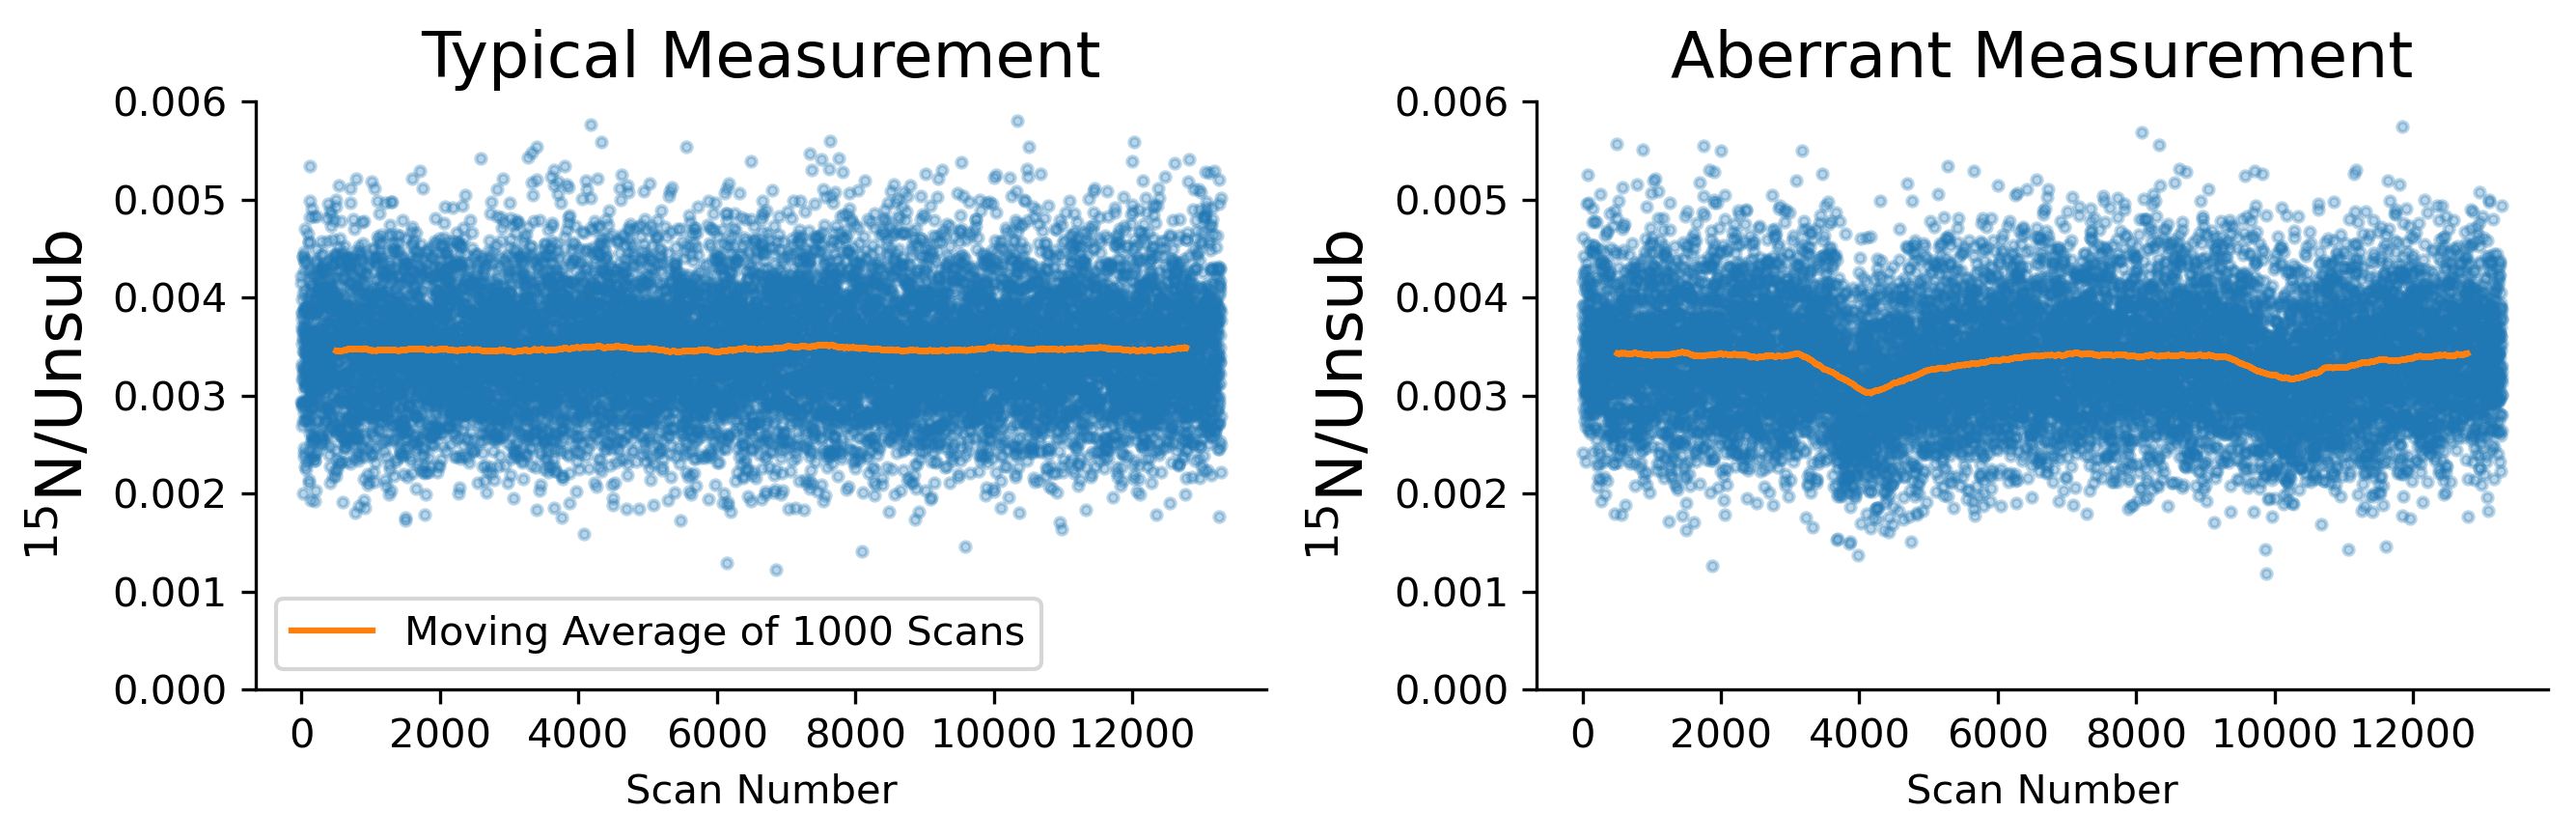

In [7]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (9,3), dpi = 300)
targetRat = '15N/Unsub'
sub1, sub2 = targetRat.split('/')

cDf = mergedList[0][0]
cDf = cDf[(cDf['counts15N'] != 0) & (cDf['countsUnsub'] != 0)]
print(len(cDf))

series = cDf[targetRat]
l = len(series)
serrs = []

cAx = axes[0]
movingAvg = []
for i in range(500,len(series)-500):
    current = series[i-500:i+500]
    mean = current.mean()
    movingAvg.append(mean)
    
cAx.scatter(range(len(series)),series, s = 6, alpha = 0.3)
cAx.plot(range(500,len(movingAvg)+500),movingAvg, label = "Moving Average of 1000 Scans", c = 'tab:orange')

cAx.set_ylim(0,0.006)
cAx.set_ylabel("$^{15}$N/Unsub", fontsize = 16)
cAx.set_xlabel("Scan Number")
cAx.set_title("Typical Measurement", fontsize =16)
cAx.legend()

cAx.spines['right'].set_visible(False)
cAx.spines['top'].set_visible(False)

cAx.spines['top'].set_visible(False)
#cAx.spines['left'].set_visible(False)
cAx.spines['right'].set_visible(False)

cDf = mergedList[6][0]
cDf = cDf[(cDf['counts15N'] != 0) & (cDf['countsUnsub'] != 0)]
print(len(cDf))

series = cDf[targetRat]
l = len(series)
serrs = []

cAx = axes[1]
movingAvg = []
for i in range(500,len(series)-500):
    current = series[i-500:i+500]
    mean = current.mean()
    movingAvg.append(mean)
    
cAx.scatter(range(len(series)),series,s = 6, alpha = 0.3)
cAx.plot(range(500,len(movingAvg)+500),movingAvg, label = "Moving Average of 1000 Scans", c = 'tab:orange')

cAx.set_ylim(0,0.006)
cAx.set_ylabel("$^{15}$N/Unsub", fontsize = 16)
cAx.set_xlabel("Scan Number")
cAx.set_title("Aberrant Measurement", fontsize =16)
#cAx.legend()

cAx.spines['right'].set_visible(False)
cAx.spines['top'].set_visible(False)

cAx.spines['top'].set_visible(False)
#cAx.spines['left'].set_visible(False)
cAx.spines['right'].set_visible(False)

plt.tight_layout()

#fig.savefig("Good vs Bad 15NUnsub.png", bbox_inches = 'tight', dpi = 1000)

TypeError: subsequenceOutlierDetection() got an unexpected keyword argument 'subsequenceLength'

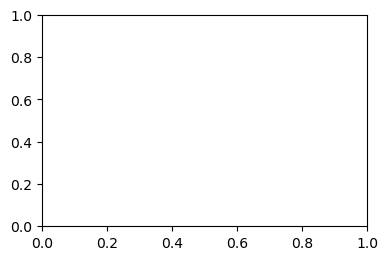

In [8]:
colors = ['k','tab:orange','tab:red','tab:green','tab:brown','tab:purple','tab:blue']
#Subs = ['13C-13C/Unsub','18O/Unsub','34S/Unsub','D/Unsub','13C/Unsub','15N/Unsub', '33S/Unsub']
Subs = ['D/Unsub']
labels = ['Typical Measurement','','','','','','Failed Measurement']
for sub in Subs:
    fig, ax = plt.subplots(figsize = (6*0.7,4*0.7), nrows = 1, ncols = 1, dpi = 100)
    for fileIdx in [0,1,2,3,4,5,6]:
        cDf = mergedList[fileIdx][0]
        cDf = cDf[(cDf['countsD'] != 0) & (cDf['countsUnsub'] != 0)].copy()
        thisSeries = cDf[sub]
        allDev = subsequenceOutlierDetection(thisSeries, subsequenceLength = 1000)
        allDevxs = range(1000,len(allDev)+1000)
        thisSNLim = allOutputDict[fileIdx]['150'][sub]['ShotNoiseLimit by Quadrature'] 
        threshold = thisSNLim * allOutputDict[fileIdx]['150'][sub]['Ratio']  * np.sqrt(len(thisSeries))
        threshold = 1.1 * np.sqrt(1000) * thisSeries.std()
        print("Proportion Above")
        print((allDev > threshold).sum() / len(allDev))
        ax.plot(allDevxs,allDev, c = colors[fileIdx], label = labels[fileIdx])
        ax.hlines(threshold, 1000,len(allDev)+1000, color = colors[fileIdx], linestyle = '--', label = labels[fileIdx] +' Threshold')
        
    ax.legend(bbox_to_anchor = (1.00,0.7))
    ax.set_xlabel("Scan Number")
    ax.set_ylabel("Anamoly Score " + r"$\alpha_{i}$")
    ax.set_xlim(0,13000)

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (9,3), dpi = 300)
targetRat = '15N/Unsub'
sub1, sub2 = targetRat.split('/')

cDf = mergedList[0][0]
cDf = cDf[(cDf['counts15N'] != 0) & (cDf['countsUnsub'] != 0)]
print(len(cDf))

series = cDf[targetRat]
l = len(series)
serrs = []

cAx = axes[0]
movingAvg = []
for i in range(500,len(series)-500):
    current = series[i-500:i+500]
    mean = current.mean()
    movingAvg.append(mean)
    
cAx.scatter(range(len(series)),series, s = 6, alpha = 0.3)
cAx.plot(range(500,len(movingAvg)+500),movingAvg, label = "Moving Average of 1000 Scans", c = 'tab:orange')

cAx.set_ylim(0,0.006)
cAx.set_ylabel("$^{15}$N/Unsub", fontsize = 16)
cAx.set_xlabel("Scan Number")
cAx.set_title("Typical Measurement", fontsize =16)
cAx.legend()

cAx.spines['right'].set_visible(False)
cAx.spines['top'].set_visible(False)

cAx.spines['top'].set_visible(False)
#cAx.spines['left'].set_visible(False)
cAx.spines['right'].set_visible(False)

cDf = mergedList[6][0]
cDf = cDf[(cDf['counts15N'] != 0) & (cDf['countsUnsub'] != 0)]
print(len(cDf))

series = cDf[targetRat]
l = len(series)
serrs = []

cAx = axes[1]
movingAvg = []
for i in range(500,len(series)-500):
    current = series[i-500:i+500]
    mean = current.mean()
    movingAvg.append(mean)
    
cAx.scatter(range(len(series)),series,s = 6, alpha = 0.3)
cAx.plot(range(500,len(movingAvg)+500),movingAvg, label = "Moving Average of 1000 Scans", c = 'tab:orange')

cAx.set_ylim(0,0.006)
cAx.set_ylabel("$^{15}$N/Unsub", fontsize = 16)
cAx.set_xlabel("Scan Number")
cAx.set_title("Aberrant Measurement", fontsize =16)
#cAx.legend()

cAx.spines['right'].set_visible(False)
cAx.spines['top'].set_visible(False)

cAx.spines['top'].set_visible(False)
#cAx.spines['left'].set_visible(False)
cAx.spines['right'].set_visible(False)

plt.tight_layout()

fig.savefig("Good vs Bad 15NUnsub.png", bbox_inches = 'tight', dpi = 1000)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FormatStrFormatter
from tqdm import tqdm


In [ ]:
toPlotDict = {}

fileList = list(sampleOutputDict.keys())
fragmentList = list(sampleOutputDict[fileList[0]].keys())

for i, file in enumerate(fileList):
    if i % 2 == 1:
        toPlotDict[file + " Standardized"] = {}
        std1Key = fileList[i-1]
        std2Key = fileList[i+1]
        for fragment, fragmentData in sampleOutputDict[file].items():
            toPlotDict[file + " Standardized"][fragment] = {}
            for isotopeKey, isotopeData in fragmentData.items():
                toPlotDict[file + " Standardized"][fragment][isotopeKey] = {'Ratio':0,'RSE':0}
                smpRatio = isotopeData['Average']
                smpErr = isotopeData['RelStdError']
                
                std1Ratio = sampleOutputDict[std1Key][fragment][isotopeKey]['Average']
                std1Error = sampleOutputDict[std1Key][fragment][isotopeKey]['RelStdError']
                
                std2Ratio = sampleOutputDict[std2Key][fragment][isotopeKey]['Average']
                std2Error = sampleOutputDict[std2Key][fragment][isotopeKey]['RelStdError']
                
                avgStd = (std1Ratio + std2Ratio) / 2
                
                #smpStd1Ratio = smpRatio / std1Ratio
                #smpStd1Err = np.sqrt(smpErr**2 + std1Error**2)
                
                #smpStd2Ratio = smpRatio / std2Ratio
                #smpStd2Err = np.sqrt(smpErr**2 + std2Error**2)
                
                #avgRat = (smpStd1Ratio + smpStd2Ratio) / 2
                
                avgRat = smpRatio / avgStd
                avgErr = np.array([std1Error, std2Error]).mean()
                
                if i == 1 and isotopeKey == '17O/Unsub':
                    print(smpRatio)
                    print(std1Ratio)
                    print(std2Ratio)
                    print(avgRat)
                #avgRat = smpStd1Ratio
                comErr = np.sqrt(smpErr**2 + avgErr **2)
                
                toPlotDict[file + " Standardized"][fragment][isotopeKey] = {'Ratio':avgRat,'RSE':comErr}
                
byFragment = {}
bySub = {}

for file, fileData in toPlotDict.items():
    for fragment, fragmentData in fileData.items():
        if fragment not in byFragment:
            byFragment[fragment] = {}
        for isotope, isotopeData in fragmentData.items():
            if isotope not in byFragment[fragment]:
                byFragment[fragment][isotope] = {'Ratios':[],'RSEs':[]}
                
            if isotope not in bySub:
                bySub[isotope] = {'Fragments':[],'Ratios':[], 'RSEs':[]}
            ratio = isotopeData['Ratio']
            error = isotopeData['RSE']
            
            byFragment[fragment][isotope]['Ratios'].append(ratio)
            byFragment[fragment][isotope]['RSEs'].append(error)
            
            bySub[isotope]['Ratios'].append(ratio)
            bySub[isotope]['RSEs'].append(error)
            bySub[isotope]['Fragments'].append(fragment)
            
sortBySub = {}
for isotope, isotopeData in bySub.items():
    frag = isotopeData['Fragments']
    rat = isotopeData['Ratios']
    err = isotopeData['RSEs']
    
    sort = [(x, y, z) for (x, y, z) in sorted(zip(frag, rat, err), key=lambda tup: float(tup[0]), reverse = True)]
    
    sFrag = [x[0] for x in sort]
    sRat = [x[1] for x in sort]
    sErr = [x[2] for x in sort]
    
    sortBySub[isotope] = {'Fragments':sFrag, 'Ratios': sRat, 'RSEs': sErr}
            
            
deltasDict = {}
for sub, subData in bySub.items():
    deltasDict[sub] = {'Deltas':[],'RSEs':[]}
    relDeltas = [1000*(r-1) for r in subData['Ratios']]
    deltasDict[sub]['Deltas'] = relDeltas
    errs = [1000 * e for e in subData['RSEs']]
    deltasDict[sub]['RSEs'] = errs
    

allFiles = {}
for obsFile, obsDict in sampleOutputDict.items():
    for subKey, subData in obsDict['150'].items():
        if subKey not in allFiles:
            allFiles[subKey] = {'Ratios':[],'Errors':[]}

        allFiles[subKey]['Ratios'].append(subData['Average'])
        allFiles[subKey]['Errors'].append(subData['StdError'])
        
averagedDict = {}

for subKey, subData in deltasDict.items():
    if subKey not in averagedDict:
        averagedDict[subKey] = {'Average':0, 'Std':0}
        
    averagedDict[subKey]['Average'] = np.array(subData['Deltas']).mean()
    averagedDict[subKey]['Std'] = np.array(subData['Deltas']).std()
    
keys = list(sampleOutputDict.keys())

In [ ]:
matplotlib.rcParams.update({'errorbar.capsize': 5})
#sampleOutputDict
#byFragment
#deltasDict

font = {'size'   : 14}

matplotlib.rc('font', **font)

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15*0.82,6*0.82), 
                         gridspec_kw={'width_ratios': [3, 2.5, 1]}, sharex = 'col')

Cmarkeredgecolor = 'k'
Cmarker = 's'
Cmarkersize = 10
Cmarkerfacecolor = 'w'
Cmew = 1.2

Smarkeredgecolor = 'darkgreen'
Smarker = 'D'
Smarkersize = 10
Smarkerfacecolor = 'w'

Hmarkeredgecolor = 'goldenrod'
Hmarker = 'o'
Hmarkersize = 10
Hmarkerfacecolor = 'w'
Hmew = 1.2

actualValueColor = 'tab:red'

#fig.supylabel('Observed Ratio', fontsize = 16)

cAx = axes[0,0]

cAx.errorbar(range(7),allFiles['13C/Unsub']['Ratios'], allFiles['13C/Unsub']['Errors'], 
             fmt = Cmarker, markersize = Cmarkersize, mfc = Cmarkerfacecolor, 
             mec = Cmarkeredgecolor, ecolor = Cmarkeredgecolor, mew  = Cmew)

xticks = list(range(7))
xtickLabels = ['Std 1','Smp 1','Std 2','Smp 2','Std 3', 'Smp 3','Std 4']

cAx.set_xticks(xticks)
cAx.set_xticklabels(xtickLabels)
cAx.set_ylim(0.0596,0.0619)
cAx.yaxis.set_major_locator(plt.MaxNLocator(3))

cAx.set_ylabel(u"$^{13}$C/Unsub", fontsize = 16)

cAx = axes[0,1]

cAx.errorbar(range(3),deltasDict['13C/Unsub']['Deltas'], deltasDict['13C/Unsub']['RSEs'], 
             fmt = Cmarker, markersize = Cmarkersize, mfc = Cmarkerfacecolor, 
             mec = Cmarkeredgecolor, ecolor = Cmarkeredgecolor, mew = Cmew)

xticks = list(range(3))
xtickLabels = ['Bracket 1', 'Bracket 2','Bracket 3']

cAx.set_ylim(18.8,22.2)
cAx.set_xlim(-0.3,2.3)

cAx.set_xticks(xticks)
cAx.set_xticklabels(xtickLabels)
cAx.set_ylabel(u"$\delta^{13}C_{STD}$", fontsize = 16)

cAx.hlines(19.578208184438452,-0.5,2.5,linestyle = '--',color = actualValueColor, 
           label = "Independent  Value")

cAx.yaxis.set_major_locator(plt.MaxNLocator(3))



cAx = axes[0,2]

cAx.errorbar(range(1),averagedDict['13C/Unsub']['Average'], averagedDict['13C/Unsub']['Std'], 
             fmt = Cmarker, markersize = Cmarkersize, mfc = Cmarkerfacecolor, 
             mec = Cmarkeredgecolor, ecolor = Cmarkeredgecolor, mew = Cmew)

xticks = list(range(1))
xtickLabels = ['Final Reported Value']

cAx.set_xticks(xticks)
cAx.set_xticklabels(xtickLabels)
cAx.set_ylabel(u"$\delta^{13}C_{STD}$", fontsize = 16)
cAx.hlines(19.578208184438452,-0.5,0.5,linestyle = '--',color = actualValueColor, 
           label = "Independently Measured\nor Estimated Value")
cAx.set_ylim(18.8,22.2)

cAx.yaxis.set_major_locator(plt.MaxNLocator(3))

#cAx.legend()

cAx = axes[1,0]

cAx.errorbar(range(7),allFiles['33S/Unsub']['Ratios'], allFiles['33S/Unsub']['Errors'], 
             fmt = Smarker, markersize = Smarkersize, mfc = Smarkerfacecolor, 
             mec = Smarkeredgecolor, ecolor = Smarkeredgecolor)

xticks = list(range(7))
xtickLabels = ['Std 1','Smp 1','Std 2','Smp 2','Std 3', 'Smp 3','Std 4']

cAx.set_xticks(xticks)
cAx.set_xticklabels(xtickLabels)
cAx.set_ylabel(u"$^{33}$S/Unsub", fontsize = 16)

cAx.yaxis.set_major_locator(plt.MaxNLocator(3))

cAx = axes[1,1]

cAx.errorbar(range(3),deltasDict['33S/Unsub']['Deltas'], deltasDict['33S/Unsub']['RSEs'], 
             fmt = Smarker, markersize = Smarkersize, mfc = Smarkerfacecolor, 
             mec = Smarkeredgecolor, ecolor = Smarkeredgecolor)

cAx.set_ylim(-4,4)
cAx.set_xlim(-0.3,2.3)

xticks = list(range(3))
xtickLabels = ['Bracket 1', 'Bracket 2','Bracket 3']

cAx.set_xticks(xticks)
cAx.set_xticklabels(xtickLabels)

cAx.set_ylabel(u"$\delta^{33}S_{STD}$", fontsize = 16)

cAx.hlines(0,-0.5,2.5,linestyle = '--',color = actualValueColor)

cAx = axes[1,2]

cAx.errorbar(range(1),averagedDict['33S/Unsub']['Average'], averagedDict['33S/Unsub']['Std'], 
             fmt = Smarker, markersize = Smarkersize, mfc = Smarkerfacecolor, 
             mec = Smarkeredgecolor, ecolor = Smarkeredgecolor)

cAx.set_ylabel(u"$\delta^{33}S_{STD}$", fontsize = 16)
cAx.set_ylim(-4,4)

xticks = list(range(1))
xtickLabels = ['Final Reported Value']

cAx.hlines(0,-0.5,0.5,linestyle = '--',color = actualValueColor)

cAx.set_xticks(xticks)
cAx.set_xticklabels(xtickLabels)

cAx = axes[2,0]

cAx.errorbar(range(7),allFiles['D/Unsub']['Ratios'], allFiles['D/Unsub']['Errors'], 
             fmt = Hmarker, markersize = Hmarkersize, mfc = Hmarkerfacecolor, 
             mec = Hmarkeredgecolor, ecolor = Hmarkeredgecolor, mew  = Hmew)

xticks = list(range(7))
xtickLabels = ['Std','Smp','Std','Smp','Std', 'Smp','Std']

cAx.set_xticks(xticks)
cAx.set_xticklabels(xtickLabels)
cAx.set_xlim(-0.5,6.5)
#cAx.set_ylim(0.0596,0.0619)

cAx.yaxis.set_major_locator(plt.MaxNLocator(3))

cAx.set_ylabel(u"$^{2}$H/Unsub", fontsize = 16)

cAx = axes[2,1]

cAx.errorbar(range(3),deltasDict['D/Unsub']['Deltas'], deltasDict['D/Unsub']['RSEs'], 
             fmt = Hmarker, markersize = Hmarkersize, mfc = Hmarkerfacecolor, 
             mec = Hmarkeredgecolor, ecolor = Hmarkeredgecolor, mew  = Hmew)

xticks = list(range(3))
xtickLabels = ['Bracket 1', 'Bracket 2','Bracket 3']

cAx.set_ylim(-10,5)
cAx.set_xlim(-0.3,2.3)

cAx.set_yticks([-7.5,-2.5,2.5])

cAx.set_xticks(xticks)
cAx.set_xticklabels(xtickLabels)
cAx.set_ylabel(u"$\delta^{2}H_{STD}$", fontsize = 16)

cAx.hlines(0,-0.5,2.5,linestyle = '--',color = actualValueColor, 
           label = "Independent  Value")

cAx = axes[2,2]

cAx.errorbar(range(1),averagedDict['D/Unsub']['Average'], averagedDict['D/Unsub']['Std'], 
             fmt = Hmarker, markersize = Hmarkersize, mfc = Hmarkerfacecolor, 
             mec = Hmarkeredgecolor, ecolor = Hmarkeredgecolor, mew  = Hmew)

xticks = list(range(1))
xtickLabels = ['Experimental Reproducibility']

cAx.set_xticks(xticks)
cAx.set_xticklabels(xtickLabels)
cAx.set_ylabel(u"$\delta^{2}H_{STD}$", fontsize = 16)
cAx.hlines(0,-0.5,0.5,linestyle = '--',color = actualValueColor, 
           label = "Independently Measured\nor Estimated Value")
cAx.set_ylim(-10,10)

cAx.set_yticks([-7.5,-2.5,2.5])

sns.despine()

plt.tight_layout()

#fig.savefig('Representative Measurements Methionine.png', dpi = 1000)

In [ ]:
import copy

allFilesNoCull = copy.deepcopy(allFiles)
deltasDictNoCull = copy.deepcopy(deltasDict)
averagedDictNoCull = copy.deepcopy(averagedDict)

rtnAllFilesDF, mergedList, allOutputDict = DataAnalyzerMN.calc_Folder_Output(folderPath, cullOn=cullOn, cullAmount=cull_amount,
                                               onlySelectedTimes=onlySelectedTimes, selectedTimes = selectedTimes, 
                                               fragmentIsotopeList = fragmentIsotopeList, 
                                               fragmentMostAbundant = fragmentMostAbundant, debug = False, 
                                               MNRelativeAbundance = MNRelativeAbundance, fileExt = fileExt, 
                                               massStrList = list(fragmentDict.keys()), removeZeroScans = True,
                                               Microscans = 1)

In [ ]:
sampleOutputDict = DataAnalyzerMN.folderOutputToDict(rtnAllFilesDF)

In [ ]:
toPlotDict = {}

fileList = list(sampleOutputDict.keys())
fragmentList = list(sampleOutputDict[fileList[0]].keys())

for i, file in enumerate(fileList):
    if i % 2 == 1:
        toPlotDict[file + " Standardized"] = {}
        std1Key = fileList[i-1]
        std2Key = fileList[i+1]
        for fragment, fragmentData in sampleOutputDict[file].items():
            toPlotDict[file + " Standardized"][fragment] = {}
            for isotopeKey, isotopeData in fragmentData.items():
                toPlotDict[file + " Standardized"][fragment][isotopeKey] = {'Ratio':0,'RSE':0}
                smpRatio = isotopeData['Average']
                smpErr = isotopeData['RelStdError']
                
                std1Ratio = sampleOutputDict[std1Key][fragment][isotopeKey]['Average']
                std1Error = sampleOutputDict[std1Key][fragment][isotopeKey]['RelStdError']
                
                std2Ratio = sampleOutputDict[std2Key][fragment][isotopeKey]['Average']
                std2Error = sampleOutputDict[std2Key][fragment][isotopeKey]['RelStdError']
                
                avgStd = (std1Ratio + std2Ratio) / 2
                
                #smpStd1Ratio = smpRatio / std1Ratio
                #smpStd1Err = np.sqrt(smpErr**2 + std1Error**2)
                
                #smpStd2Ratio = smpRatio / std2Ratio
                #smpStd2Err = np.sqrt(smpErr**2 + std2Error**2)
                
                #avgRat = (smpStd1Ratio + smpStd2Ratio) / 2
                
                avgRat = smpRatio / avgStd
                avgErr = np.array([std1Error, std2Error]).mean()
                
                if i == 1 and isotopeKey == '17O/Unsub':
                    print(smpRatio)
                    print(std1Ratio)
                    print(std2Ratio)
                    print(avgRat)
                #avgRat = smpStd1Ratio
                comErr = np.sqrt(smpErr**2 + avgErr **2)
                
                toPlotDict[file + " Standardized"][fragment][isotopeKey] = {'Ratio':avgRat,'RSE':comErr}
                
byFragment = {}
bySub = {}

for file, fileData in toPlotDict.items():
    for fragment, fragmentData in fileData.items():
        if fragment not in byFragment:
            byFragment[fragment] = {}
        for isotope, isotopeData in fragmentData.items():
            if isotope not in byFragment[fragment]:
                byFragment[fragment][isotope] = {'Ratios':[],'RSEs':[]}
                
            if isotope not in bySub:
                bySub[isotope] = {'Fragments':[],'Ratios':[], 'RSEs':[]}
            ratio = isotopeData['Ratio']
            error = isotopeData['RSE']
            
            byFragment[fragment][isotope]['Ratios'].append(ratio)
            byFragment[fragment][isotope]['RSEs'].append(error)
            
            bySub[isotope]['Ratios'].append(ratio)
            bySub[isotope]['RSEs'].append(error)
            bySub[isotope]['Fragments'].append(fragment)
            
sortBySub = {}
for isotope, isotopeData in bySub.items():
    frag = isotopeData['Fragments']
    rat = isotopeData['Ratios']
    err = isotopeData['RSEs']
    
    sort = [(x, y, z) for (x, y, z) in sorted(zip(frag, rat, err), key=lambda tup: float(tup[0]), reverse = True)]
    
    sFrag = [x[0] for x in sort]
    sRat = [x[1] for x in sort]
    sErr = [x[2] for x in sort]
    
    sortBySub[isotope] = {'Fragments':sFrag, 'Ratios': sRat, 'RSEs': sErr}
            
            
deltasDict = {}
for sub, subData in bySub.items():
    deltasDict[sub] = {'Deltas':[],'RSEs':[]}
    relDeltas = [1000*(r-1) for r in subData['Ratios']]
    deltasDict[sub]['Deltas'] = relDeltas
    errs = [1000 * e for e in subData['RSEs']]
    deltasDict[sub]['RSEs'] = errs
    

allFiles = {}
for obsFile, obsDict in sampleOutputDict.items():
    for subKey, subData in obsDict['150'].items():
        if subKey not in allFiles:
            allFiles[subKey] = {'Ratios':[],'Errors':[]}

        allFiles[subKey]['Ratios'].append(subData['Average'])
        allFiles[subKey]['Errors'].append(subData['StdError'])
        
averagedDict = {}

for subKey, subData in deltasDict.items():
    if subKey not in averagedDict:
        averagedDict[subKey] = {'Average':0, 'Std':0}
        
    averagedDict[subKey]['Average'] = np.array(subData['Deltas']).mean()
    averagedDict[subKey]['Std'] = np.array(subData['Deltas']).std()
    
keys = list(sampleOutputDict.keys())



In [ ]:
matplotlib.rcParams.update({'errorbar.capsize': 5})
#sampleOutputDict
#byFragment
#deltasDict

percentZero = [1.5,1.9,1.4,3.3,2.5,2.9,3.1]

font = {'size'   : 14}

matplotlib.rc('font', **font)

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15*0.82,6*0.82), 
                         gridspec_kw={'width_ratios': [3, 2.5, 1]}, sharex = 'col')

Smarkeredgecolor = 'xkcd:navy blue'
Smarker = 'D'
Smarkersize = 10
Smarkerfacecolor = 'w'

Hmarkeredgecolor = 'goldenrod'
Hmarker = 'o'
Hmarkersize = 10
Hmarkerfacecolor = 'w'
Hmew = 1.2

actualValueColor = 'tab:red'

cAx = axes[0,0]

cAx.errorbar(range(7),allFiles['D/Unsub']['Ratios'], allFiles['D/Unsub']['Errors'], 
             fmt = Smarker, markersize = Smarkersize, mfc = Smarkerfacecolor, 
             mec = Smarkeredgecolor, ecolor = Smarkeredgecolor)

for i in range(7):
    cAx.text(i + 0.18, allFiles['D/Unsub']['Ratios'][i] + 0.0000018 ,str(percentZero[i]))

xticks = list(range(7))
xtickLabels = ['Std 1','Smp 1','Std 2','Smp 2','Std 3', 'Smp 3','Std 4']

cAx.set_xticks(xticks)
cAx.set_xticklabels(xtickLabels)
cAx.set_ylabel(u"$^{2}$H/Unsub", fontsize = 16)

cAx.yaxis.set_major_locator(plt.MaxNLocator(3))

cAx = axes[0,1]

cAx.set_title("Culling Zero Scans", x=-0., y=1, fontsize = 22)
cAx.errorbar(range(3),deltasDict['D/Unsub']['Deltas'], deltasDict['D/Unsub']['RSEs'], 
             fmt = Smarker, markersize = Smarkersize, mfc = Smarkerfacecolor, 
             mec = Smarkeredgecolor, ecolor = Smarkeredgecolor)

cAx.set_ylim(-10,15)
cAx.set_xlim(-0.3,2.3)

xticks = list(range(3))
xtickLabels = ['Bracket 1', 'Bracket 2','Bracket 3']

cAx.set_xticks(xticks)
cAx.set_xticklabels(xtickLabels)

cAx.set_ylabel(u"$\delta^{2}H_{STD}$", fontsize = 16)

cAx.hlines(0,-0.5,2.5,linestyle = '--',color = actualValueColor)

cAx = axes[0,2]

cAx.errorbar(range(1),averagedDict['D/Unsub']['Average'], averagedDict['D/Unsub']['Std'], 
             fmt = Smarker, markersize = Smarkersize, mfc = Smarkerfacecolor, 
             mec = Smarkeredgecolor, ecolor = Smarkeredgecolor)

cAx.set_ylabel(u"$\delta^{2}H_{STD}$", fontsize = 16)
cAx.set_ylim(-10,15)

xticks = list(range(1))
xtickLabels = ['Final Reported Value']

cAx.hlines(0,-0.5,0.5,linestyle = '--',color = actualValueColor)

cAx.set_xticks(xticks)
cAx.set_xticklabels(xtickLabels)

cAx = axes[1,0]

cAx.errorbar(range(7),allFilesNoCull['D/Unsub']['Ratios'], allFilesNoCull['D/Unsub']['Errors'], 
             fmt = Hmarker, markersize = Hmarkersize, mfc = Hmarkerfacecolor, 
             mec = Hmarkeredgecolor, ecolor = Hmarkeredgecolor, mew  = Hmew)

xticks = list(range(7))
xtickLabels = ['Std','Smp','Std','Smp','Std', 'Smp','Std']

cAx.set_xticks(xticks)
cAx.set_xticklabels(xtickLabels)
cAx.set_xlim(-0.5,6.5)
#cAx.set_ylim(0.0596,0.0619)

cAx.yaxis.set_major_locator(plt.MaxNLocator(3))

cAx.set_ylabel(u"$^{2}$H/Unsub", fontsize = 16)

cAx = axes[1,1]


cAx.errorbar(range(3),deltasDictNoCull['D/Unsub']['Deltas'], deltasDictNoCull['D/Unsub']['RSEs'], 
             fmt = Hmarker, markersize = Hmarkersize, mfc = Hmarkerfacecolor, 
             mec = Hmarkeredgecolor, ecolor = Hmarkeredgecolor, mew  = Hmew)

xticks = list(range(3))
xtickLabels = ['Bracket 1', 'Bracket 2','Bracket 3']

cAx.set_ylim(-10,15)
cAx.set_xlim(-0.3,2.3)

#cAx.set_yticks([-7.5,-2.5,2.5])

cAx.set_xticks(xticks)
cAx.set_xticklabels(xtickLabels)
cAx.set_ylabel(u"$\delta^{2}H_{STD}$", fontsize = 16)

cAx.hlines(0,-0.5,2.5,linestyle = '--',color = actualValueColor, 
           label = "Independent  Value")
cAx.set_title("Without Culling Zero Scans", x=-0., y=1, fontsize = 22)

cAx = axes[1,2]

cAx.errorbar(range(1),averagedDictNoCull['D/Unsub']['Average'], averagedDictNoCull['D/Unsub']['Std'], 
             fmt = Hmarker, markersize = Hmarkersize, mfc = Hmarkerfacecolor, 
             mec = Hmarkeredgecolor, ecolor = Hmarkeredgecolor, mew  = Hmew)

xticks = list(range(1))
xtickLabels = ['Experimental Reproducibility']

cAx.set_xticks(xticks)
cAx.set_xticklabels(xtickLabels)
cAx.set_ylabel(u"$\delta^{2}H_{STD}$", fontsize = 16)
cAx.hlines(0,-0.5,0.5,linestyle = '--',color = actualValueColor, 
           label = "Independently Measured\nor Estimated Value")

cAx.set_ylim(-10,15)




#cAx.set_yticks([-7.5,-2.5,2.5])

sns.despine()

plt.tight_layout()

fig.savefig('Methionine Deuterium.png', dpi = 1000)

In [ ]:
for i in range(0,7):
    print(mergedList[i][0]['countsD'].mean())